## Black Scholes model for Option Pricing

In [24]:
#Implementing Black Scholes formula

import numpy as np
from scipy.stats import norm

#define variables
r = 0.01
S = 30
K = 40
T = 240/365 #Time to maturity
sigma = 0.3

# For European Call/Put options
def blackscholes(r, S, K, T, sigma, type = 'Call'):
    
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/ (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == 'Call':
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == 'Put':
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price
    except:
        print("Please check the above parameters")

print("Option Price is ", round(blackscholes(r, S, K, T, sigma, type = 'Call'),2))


Option Price is  0.51


## Heston Model for Option Pricing
Heston model considers variance as a stochastic process (unlike in Black Scholes model, variance is assumed constant)

Heston model is described by the bivariate stochastic process for stock price St and its variance vt. 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Parameters
S0 = 100.0
T = 1.0                # time in years
r= 0.03
N = 252                # number of time steps in simulation (i.e. trading days)
M = 1000              # number of simulations

# Heston dependence parameters
kappa = 3              # rate of mean resversion to long-term variance
theta = 0.2**2         # long-term variance under risk-neutral dynamics
v0 = 0.25**2           # initial variance 
rho = 0.7              # correlation between returns and variance under risk neutral measure
sigma = 0.6            # volatility of volatility

def heston_model_sim(S0, v0, rho, kappa, theta, sigma, T, N, M):
    dt = T/N
    mu = np.array([0,0])       # we have 2 random variables here (price and variance)
    cov = np.array([[1, rho],  #covariance matrix of returns and variance 
                   [rho,1]])
    
    # array for storing prices and variances
    # Be careful we need to use 'float' for S0 and v0!!!
    S = np.full(shape = (N+1,M), fill_value = S0) #Price array matrix
    v = np.full(shape = (N+1,M), fill_value = v0)  #Variance array matrix
    
    # random sampling correlated brownian motions under risk-neutral measure
    Z = np.random.multivariate_normal(mu, cov, (N,M))
    
    for i in range(1, N+1):
        '''Using Euler's discretization'''
        S[i] = S[i-1] * np.exp((r - 0.5*v[i-1])*dt + np.sqrt(v[i-1] *dt)* Z[i-1,:,0])
        # Z[i-1,:,0] with 0 here denotes the first variable 'Price'. 
        # In here, we take every simulations for time point (i-1)
        
        v[i] = np.maximum(v[i-1] + kappa*(theta - v[i-1])*dt + sigma*np.sqrt(v[i-1])*dt + sigma*np.sqrt(v[i-1]*dt)*Z[i-1,:,1],0)
        # make sure we take positive variances
    return S, v

#Simulate with 2 different correlation
rho_p = 0.98
rho_n = 0.98

S_p, v_p = heston_model_sim(S0, v0, rho_p, kappa, theta, sigma, T, N, M)
S_n, v_n = heston_model_sim(S0, v0, rho_n, kappa, theta, sigma, T, N, M)

Text(0, 0.5, 'Variance')

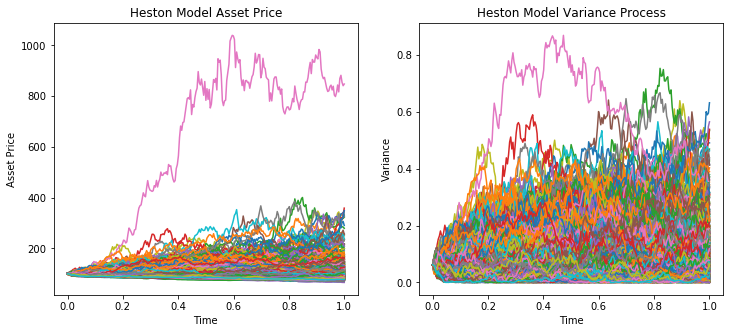

In [2]:
#Plotting the asset prices and variances over time
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))
time = np.linspace(0, T, N+1)
ax1.plot(time, S_p)
ax1.set_title('Heston Model Asset Price')
ax1.set_xlabel('Time')
ax1.set_ylabel('Asset Price')

ax2.plot(time, v_p)
ax2.set_title('Heston Model Variance Process')
ax2.set_xlabel('Time')
ax2.set_ylabel('Variance')

## Geometric Brownian Motion

GBM is a continous stochastic process, which help to find differential of price and from that we can simulate price in the future.